In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime as dt

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Medical%20Appointment%20No%20Shows/KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
print("dataframe size is {} rows, columns". format(df.shape[0], df.shape[1]))

dataframe size is 110527 rows, columns


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.isnull().sum().any()

False

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(["PatientId","AppointmentID"], axis=1, inplace=True)

In [9]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
df.columns = df.columns.str.lower()
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df.rename(columns={'handcap' : 'handicap', 'hipertension':'hypertension'}, inplace=True)
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
def parse_date(date):
    if date == '':
        return None
    else:
        return (dt.strptime(date, "%Y-%m-%dT%H:%M:%S%fz"))
    
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)
    


def get_hour(date):
    if date == '':
        return None
    else:
        return parse_maybe_int(str(parse_date(date)).split(' ')[1].split(':')[0])
    
def get_day(date):
    if date == '':
        return None
    else:
        return parse_date(date).strftime('%A')
        
        
        
def get_month(date):
    if date == '':
        return None
    else:
        return parse_maybe_int(str(parse_date(date)).split('-')[1])
    
def get_year(date):
    if date == '':
        return None
    else:
        return parse_maybe_int(str(parse_date(date)).split('-')[0])
    
    

df['scheduledhour'] = df['scheduledday'].apply(lambda x: get_hour(x))
df['scheduleddayofweek'] = df['scheduledday'].apply(lambda x: get_day(x))
df['scheduledmonth'] = df['scheduledday'].apply(lambda x: get_month(x))
df['scheduledyear'] = df['scheduledday'].apply(lambda x: get_year(x))
df['appointmentdayofweek'] = df['appointmentday'].apply(lambda x: get_day(x))
df['appointmentmonth'] = df['appointmentday'].apply(lambda x: get_month(x))
df['appointmentyear'] = df['appointmentday'].apply(lambda x: get_year(x))
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show,scheduledhour,scheduleddayofweek,scheduledmonth,scheduledyear,appointmentdayofweek,appointmentmonth,appointmentyear
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,4,2016,Friday,4,2016
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,Friday,4,2016,Friday,4,2016
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,Friday,4,2016,Friday,4,2016
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,Friday,4,2016,Friday,4,2016
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,Friday,4,2016,Friday,4,2016


In [14]:
df.rename(columns={'no-show':'showed'}, inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,scheduledhour,scheduleddayofweek,scheduledmonth,scheduledyear,appointmentdayofweek,appointmentmonth,appointmentyear
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,4,2016,Friday,4,2016
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,Friday,4,2016,Friday,4,2016
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,Friday,4,2016,Friday,4,2016
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,Friday,4,2016,Friday,4,2016
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,Friday,4,2016,Friday,4,2016


In [15]:
df['showed'] = df['showed'].apply(lambda x: 1 if x=='No' else 0 )
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,scheduledhour,scheduleddayofweek,scheduledmonth,scheduledyear,appointmentdayofweek,appointmentmonth,appointmentyear
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1,18,Friday,4,2016,Friday,4,2016
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1,16,Friday,4,2016,Friday,4,2016
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1,16,Friday,4,2016,Friday,4,2016
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,17,Friday,4,2016,Friday,4,2016
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1,16,Friday,4,2016,Friday,4,2016


,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,scheduledhour,scheduledmonth,scheduledyear,appointmentmonth,appointmentyear
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.0
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067,10.774517,4.823871,2015.999439,5.210048,2016.0
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,3.216189,0.715801,0.023678,0.473780,0.0
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,2015.000000,4.000000,2016.0
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,4.000000,2016.000000,5.000000,2016.0
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,5.000000,2016.000000,5.000000,2016.0
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,13.000000,5.000000,2016.000000,5.000000,2016.0
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,21.000000,12.000000,2016.000000,6.000000,2016.0


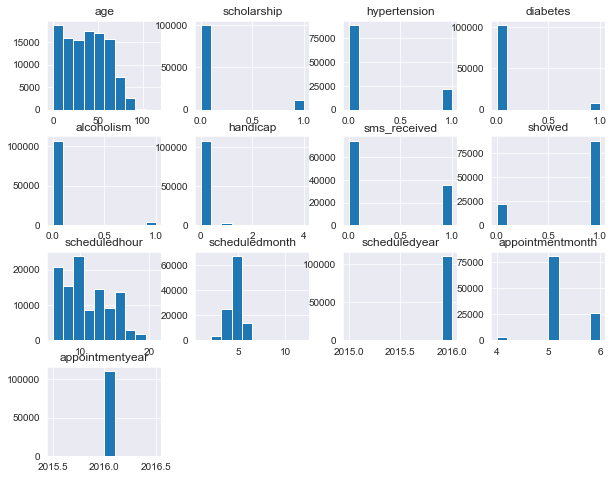

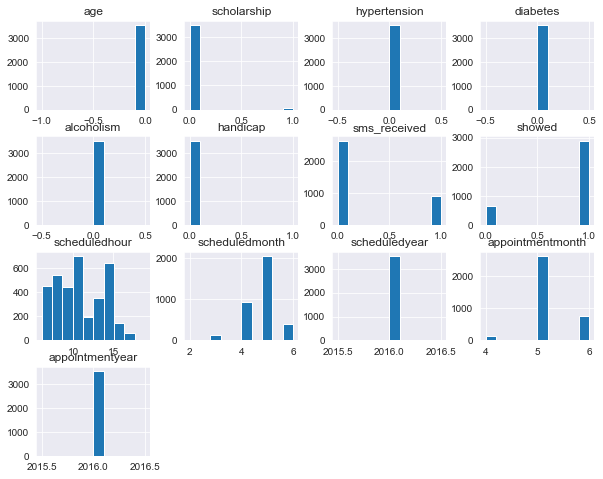

In [16]:
df.hist(figsize=(10, 8));

df[df.age <= 0].hist(figsize=(10, 8));

df.describe()

In [17]:
rindx=df[df['age'] == -1].index
df.drop(rindx, inplace=True)
df[df['age'] == -1]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,scheduledhour,scheduleddayofweek,scheduledmonth,scheduledyear,appointmentdayofweek,appointmentmonth,appointmentyear


In [18]:
df[df['age'] == 0].describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,scheduledhour,scheduledmonth,scheduledyear,appointmentmonth,appointmentyear
count,3539.0,3539.000000,3539.0,3539.0,3539.0,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.0,3539.000000,3539.0
mean,0.0,0.014693,0.0,0.0,0.0,0.000283,0.253461,0.819441,10.846849,4.763210,2016.0,5.180277,2016.0
std,0.0,0.120340,0.0,0.0,0.0,0.016810,0.435054,0.384707,2.901871,0.706021,0.0,0.471033,0.0
min,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,6.000000,2.000000,2016.0,4.000000,2016.0
25%,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000,8.000000,4.000000,2016.0,5.000000,2016.0
50%,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000,10.000000,5.000000,2016.0,5.000000,2016.0
75%,0.0,0.000000,0.0,0.0,0.0,0.000000,1.000000,1.000000,13.000000,5.000000,2016.0,5.000000,2016.0
max,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,19.000000,6.000000,2016.0,6.000000,2016.0


In [19]:
showed_up = df.showed == True
no_showed = df.showed == False
showed = showed_up.mean()
showed

0.7980656135208005

In [20]:
missed = no_showed.mean() 
missed

0.20193438647919945

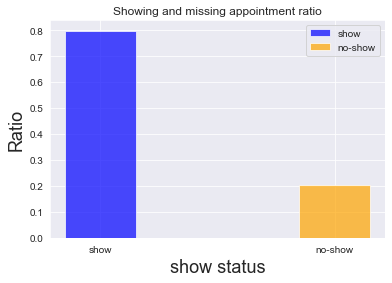

In [21]:
show_bar = plt.bar(0, showed, width=.3, alpha=0.7, color ='blue', label='show' )
no_show_bar = plt.bar(1, missed, width=.3, alpha=0.7, color='orange', label='no-show')

plt.xticks([0, 1], ['show', 'no-show'])
plt.xlabel('show status', fontsize=18)
plt.ylabel('Ratio', fontsize=18)
plt.title('Showing and missing appointment ratio');
plt.legend();

In [22]:
df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [23]:
Female_prop = df.gender.value_counts()[0] / df.shape[0]
Female_prop

0.6499737618297957

In [24]:
Male_prop = df.gender.value_counts()[1] / df.shape[0]
Male_prop

0.3500262381702043

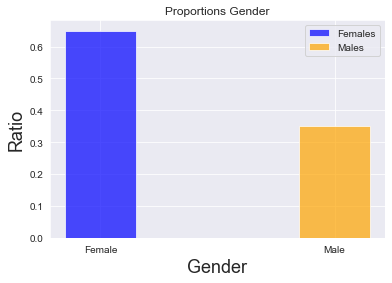

In [25]:
Female_bar = plt.bar(0, Female_prop, width=.3, alpha=0.7, color ='blue', label='Females' )
Male_bar = plt.bar(1, Male_prop, width=.3, alpha=0.7, color='orange', label='Males')

plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Ratio', fontsize=18)
plt.title('Proportions Gender');
plt.legend();

In [26]:
df.groupby('gender').showed.value_counts()

gender  showed
F       1         57245
        0         14594
M       1         30962
        0          7725
Name: showed, dtype: int64

In [27]:
df.groupby('gender')['showed'].mean()

gender
F    0.796851
M    0.800321
Name: showed, dtype: float64

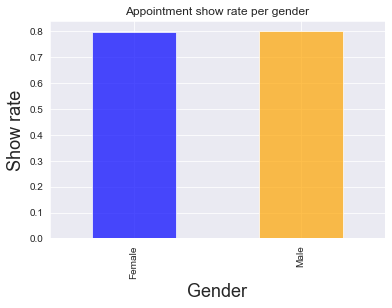

In [28]:
df.groupby('gender')['showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Show rate', fontsize=18)
plt.xlabel('Gender', fontsize=18)
plt.title('Appointment show rate per gender');

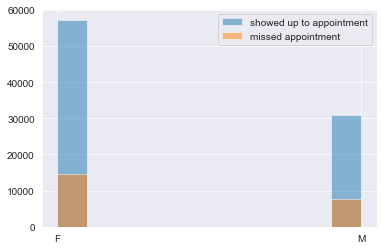

In [29]:
df.gender[showed_up].hist(alpha=0.5, label = 'showed up to appointment')
df.gender[no_showed].hist(alpha=0.5, label = 'missed appointment');
plt.legend();

In [30]:
hyper_prop = df.hypertension.mean()*100
hyper_prop

19.724770642201836

In [31]:
diabetes_prop = df.diabetes.mean()*100
diabetes_prop

7.186544342507645

In [32]:
alcoholism_prop = df.alcoholism.mean()*100
alcoholism_prop

3.040008685739102

In [33]:
handicap_prop = df.handicap.mean()*100
handicap_prop

2.224815880426325

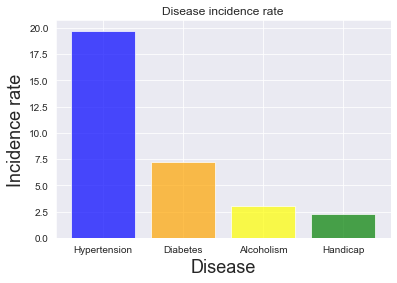

In [34]:
colors = ['blue', 'orange', 'yellow', 'green']
locations = [1, 2, 3, 4]
heights = [hyper_prop, diabetes_prop, alcoholism_prop, handicap_prop]
labels = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']

plt.bar(locations,heights,color=colors, alpha=0.7);
plt.title('Disease incidence rate')
plt.xlabel('Disease', fontsize=18)
plt.ylabel('Incidence rate', fontsize=18)
plt.xticks(locations, labels);

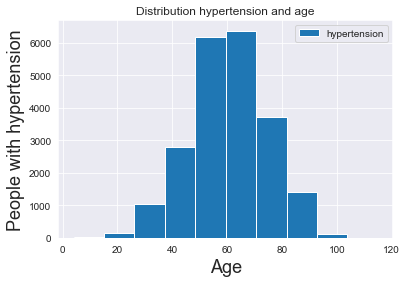

In [35]:
df.age[df.hypertension == 1].hist(bins = 10, label = 'hypertension' );
plt.title('Distribution hypertension and age')
plt.xlabel('Age', fontsize=18);
plt.ylabel('People with hypertension', fontsize=18);
plt.legend();

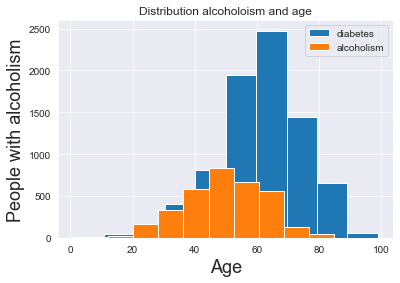

In [36]:
df.age[df.diabetes == 1].hist(bins = 10, label = 'diabetes' );
plt.title('Distribution diabetes and age')
plt.xlabel('Age', fontsize=18);
plt.ylabel('People with diabetes', fontsize=18);
plt.legend();

df.age[df.alcoholism == 1].hist(bins = 10, label = 'alcoholism' );
plt.title('Distribution alcoholoism and age')
plt.xlabel('Age', fontsize=18);
plt.ylabel('People with alcoholism', fontsize=18);
plt.legend();

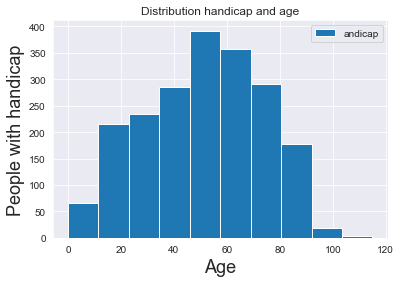

In [37]:
df.age[df.handicap == 1].hist(bins = 10, label = 'andicap' );
plt.title('Distribution handicap and age')
plt.xlabel('Age', fontsize=18);
plt.ylabel('People with handicap', fontsize=18);
plt.legend();

In [38]:
df.groupby("hypertension")["showed"].mean()

hypertension
0    0.790961
1    0.826980
Name: showed, dtype: float64

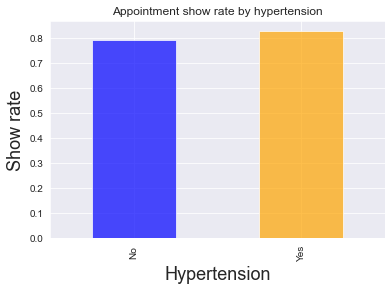

In [39]:
df.groupby('hypertension')['showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Appointment show rate by hypertension');
plt.ylabel('Show rate', fontsize=18)
plt.xlabel('Hypertension', fontsize=18);

In [40]:
df.groupby('diabetes')['showed'].mean()

diabetes
0    0.796370
1    0.819967
Name: showed, dtype: float64

alcoholism
0    0.798052
1    0.798512
Name: showed, dtype: float64

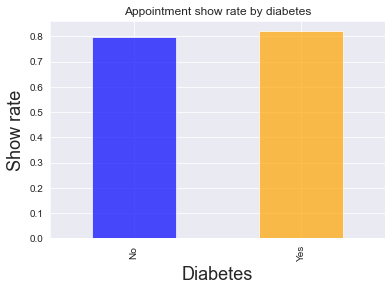

In [41]:
df.groupby('diabetes')['showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Appointment show rate by diabetes');
plt.ylabel('Show rate', fontsize=18)
plt.xlabel('Diabetes', fontsize=18);

df.groupby('alcoholism')['showed'].mean()

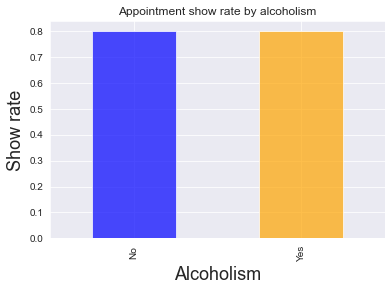

In [42]:
df.groupby('alcoholism')['showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Appointment show rate by alcoholism');
plt.ylabel('Show rate', fontsize=18)
plt.xlabel('Alcoholism', fontsize=18);

In [43]:
df.groupby('handicap')['showed'].mean()

handicap
0    0.797645
1    0.820764
2    0.797814
3    0.769231
4    0.666667
Name: showed, dtype: float64

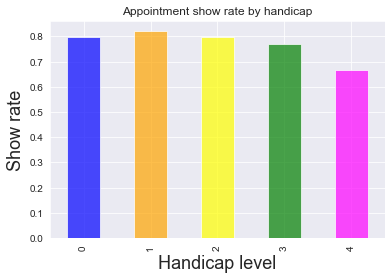

In [44]:
df.groupby('handicap')['showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange', 'yellow', 'green', 'magenta']);
plt.title('Appointment show rate by handicap');
plt.ylabel('Show rate', fontsize=18)
plt.xlabel('Handicap level', fontsize=18);

In [45]:
df.groupby('gender')['hypertension'].mean()

gender
F    0.213519
M    0.167033
Name: hypertension, dtype: float64

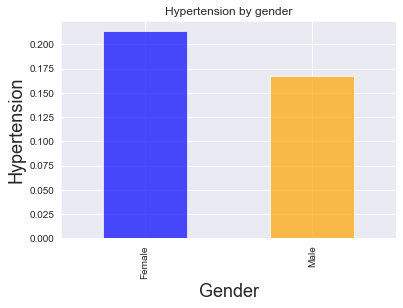

In [46]:
df.groupby('gender')['hypertension'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Hypertension by gender');
plt.xlabel('Gender', fontsize=18);
plt.ylabel('Hypertension', fontsize=18);

In [48]:
df.groupby('gender')['diabetes'].mean()

gender
F    0.078036
M    0.060408
Name: diabetes, dtype: float64

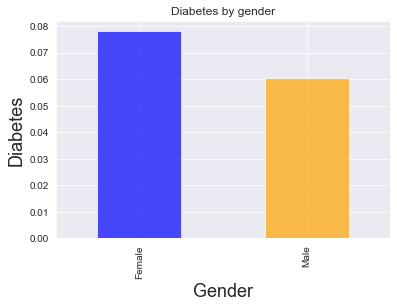

In [49]:
df.groupby('gender')['diabetes'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Diabetes by gender');
plt.xlabel('Gender', fontsize=18);
plt.ylabel('Diabetes', fontsize=18);

In [50]:
df.groupby('gender')["alcoholism"].mean()

gender
F    0.017024
M    0.055238
Name: alcoholism, dtype: float64

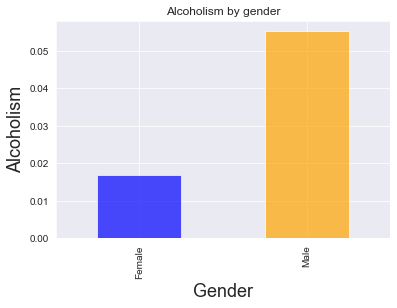

In [51]:
df.groupby('gender')['alcoholism'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Alcoholism by gender');
plt.xlabel('Gender', fontsize=18);
plt.ylabel('Alcoholism', fontsize=18);

In [52]:
df.groupby('gender')['handicap'].mean()

gender
F    0.019544
M    0.027270
Name: handicap, dtype: float64

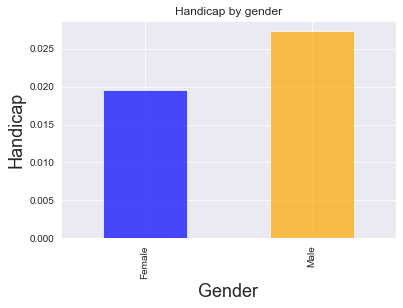

In [53]:
df.groupby('gender')['handicap'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Handicap by gender');
plt.xlabel('Gender', fontsize=18);
plt.ylabel('Handicap', fontsize=18);

In [55]:
df.scholarship.value_counts()      

0    99665
1    10861
Name: scholarship, dtype: int64

In [56]:
noscholar_prop = df.scholarship.value_counts()[0] / df.shape[0]
noscholar_prop

0.9017335287624632

In [57]:
scholar_prop = df.scholarship.value_counts()[1] / df.shape[0]
scholar_prop

0.09826647123753687

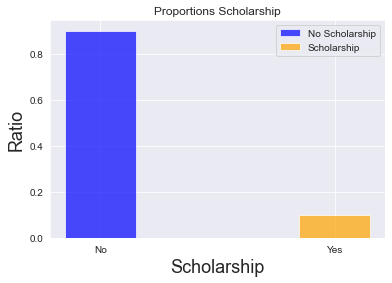

In [58]:
noscholar_bar = plt.bar(0, noscholar_prop, width=.3, alpha=0.7, color ='blue', label='No Scholarship' )
scholar_bar = plt.bar(1, scholar_prop, width=.3, alpha=0.7, color='orange', label='Scholarship')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Scholarship', fontsize=18)
plt.ylabel('Ratio', fontsize=18)
plt.title('Proportions Scholarship');
plt.legend();

In [59]:
df.groupby('scholarship').showed.mean()

scholarship
0    0.801926
1    0.762637
Name: showed, dtype: float64

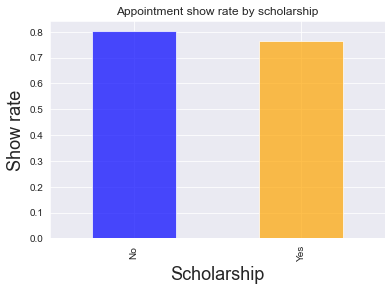

In [60]:
df.groupby('scholarship')['showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Appointment show rate by scholarship')
plt.xlabel('Scholarship', fontsize=18)
plt.ylabel('Show rate', fontsize=18);

In [61]:
df.groupby('gender').scholarship.mean()

gender
F    0.123234
M    0.051904
Name: scholarship, dtype: float64

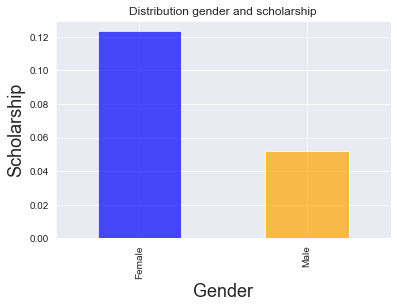

In [62]:
df.groupby('gender').scholarship.mean().plot(alpha=0.7, color = ['blue', 'orange'], kind='bar');
plt.xticks([0,1], ['Female', 'Male'])
plt.title('Distribution gender and scholarship')
plt.xlabel('Gender', fontsize=18);
plt.ylabel('Scholarship', fontsize=18);

In [63]:
handi_count = df.groupby(['gender', 'handicap']).count()['showed']
handi_count

gender  handicap
F       0           70549
        1            1181
        2             105
        3               3
        4               1
M       0           37736
        1             861
        2              78
        3              10
        4               2
Name: showed, dtype: int64

In [64]:
hanndi_total = df.groupby('gender').count()['showed']
hanndi_total

gender
F    71839
M    38687
Name: showed, dtype: int64

In [65]:
m_handi_prop = handi_count['M'] / hanndi_total['M']
m_handi_prop

handicap
0    0.975418
1    0.022256
2    0.002016
3    0.000258
4    0.000052
Name: showed, dtype: float64

In [66]:
f_handi_prop = handi_count['F'] / hanndi_total['F']
f_handi_prop

handicap
0    0.982043
1    0.016440
2    0.001462
3    0.000042
4    0.000014
Name: showed, dtype: float64

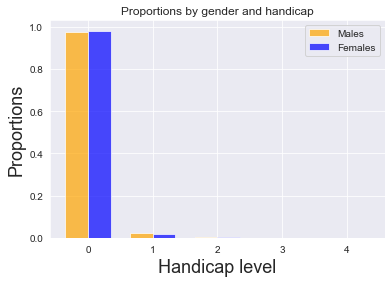

In [67]:
ind = np.arange(len(m_handi_prop))
width = 0.35
Male_bars = plt.bar(ind, m_handi_prop, width, alpha=0.7, color='orange', label='Males')
Female_bars = plt.bar(ind+width, f_handi_prop, width, alpha=0.7, color ='blue', label='Females' )

plt.xlabel('Handicap level', fontsize=18)
plt.ylabel('Proportions', fontsize=18)
plt.title('Proportions by gender and handicap');
locations = ind + width/2
labels = [0, 1, 2, 3, 4]
plt.xticks(locations, labels)
plt.legend();

In [68]:
df[['showed', 'age']].describe()

,showed,age
count,110526.000000,110526.000000
mean,0.798066,37.089219
std,0.401445,23.110026
min,0.000000,0.000000
25%,1.000000,18.000000
50%,1.000000,37.000000
75%,1.000000,55.000000
max,1.000000,115.000000


In [69]:
bin_edges = [-1, 2, 12, 19, 39, 59, 115 ]
bin_names = ['infants', 'children', 'teens', 'youth', 'adults', 'seniors']
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)

df.shape[0] == df.query('age_group == "infants"').age.count() + df.query('age_group == "children"').age.count() + df.query('age_group == "teens"').age.count()+ df.query('age_group == "youth"').age.count()+ df.query('age_group == "adults"').age.count() + df.query('age_group == "seniors"').age.count()

True

In [70]:
age_group_show_means = df.groupby('age_group')['showed'].mean()
age_group_show_means

age_group
infants     0.824226
children    0.779436
teens       0.740373
youth       0.768618
adults      0.811918
seniors     0.846880
Name: showed, dtype: float64

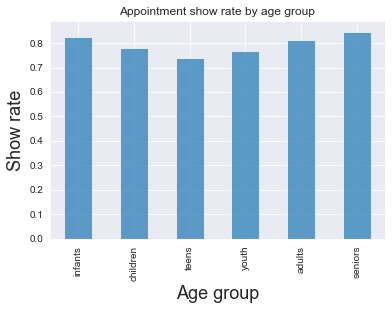

In [71]:
df.groupby('age_group')['showed'].mean().plot(kind='bar', alpha=.7);

plt.xticks([0, 1, 2, 3, 4, 5] , ['infants', 'children', 'teens', 'youth', 'adults', 'seniors'])
plt.title('Appointment show rate by age group');
plt.ylabel('Show rate', fontsize=18)
plt.xlabel('Age group', fontsize=18);

In [72]:
df.age_group.value_counts()

adults      30072
youth       28870
seniors     21173
children    13606
teens        9375
infants      7430
Name: age_group, dtype: int64

In [73]:
infants_prop = df.age_group.value_counts()[5] / df.shape[0]
infants_prop

0.06722400159238551

In [74]:
teens_prop = df.age_group.value_counts()[4] / df.shape[0]
teens_prop

0.08482167091905977

In [75]:
children_prop = df.age_group.value_counts()[3] / df.shape[0]
children_prop

0.12310225648263758

In [76]:
seniors_prop = df.age_group.value_counts()[2] / df.shape[0]
seniors_prop

0.1915657854260536

In [77]:
youth_prop = df.age_group.value_counts()[1] / df.shape[0]
youth_prop

0.2612055082062139

In [78]:
adults_prop = df.age_group.value_counts()[0] / df.shape[0]
adults_prop

0.27208077737364966

In [79]:
infants_prop + teens_prop +children_prop +seniors_prop +youth_prop+adults_prop == 1

True

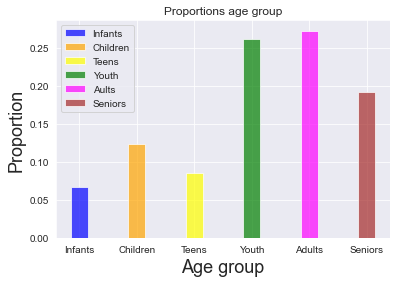

In [80]:
infants_bar = plt.bar(0, infants_prop, width=.3, alpha=0.7, color ='blue', label='Infants' )
children_bar = plt.bar(1, children_prop, width=.3, alpha=0.7, color='orange', label='Children')
teens_bar = plt.bar(2, teens_prop, width=.3, alpha=0.7, color='yellow', label='Teens')
youth_bar = plt.bar(3, youth_prop, width=.3, alpha=0.7, color='green', label='Youth')
adults_bar = plt.bar(4, adults_prop, width=.3, alpha=0.7, color='magenta', label='Aults')
seniors_bar = plt.bar(5, seniors_prop, width=.3, alpha=0.7, color='brown', label='Seniors')

plt.xticks([0, 1, 2, 3, 4, 5], ['Infants', 'Children', 'Teens', 'Youth', 'Adults', 'Seniors'])
plt.xlabel('Age group', fontsize=18)
plt.ylabel('Proportion', fontsize=18)
plt.title('Proportions age group');
plt.legend();

In [81]:
df.sms_received.value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

In [82]:
sms_prop = df.sms_received.value_counts()[0] / df.shape[0]
sms_prop

0.6789714637279916

In [83]:
no_sms_prop = df.sms_received.value_counts()[1] / df.shape[0]
no_sms_prop

0.3210285362720084

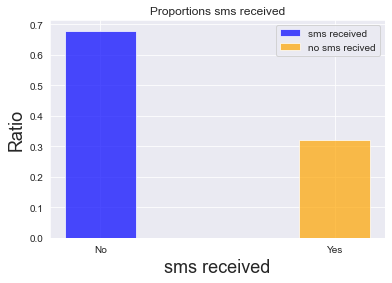

In [84]:
sms_bar = plt.bar(0, sms_prop, width=.3, alpha=0.7, color ='blue', label='sms received' )
no_sms_bar = plt.bar(1, no_sms_prop, width=.3, alpha=0.7, color='orange', label='no sms recived')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('sms received', fontsize=18)
plt.ylabel('Ratio', fontsize=18)
plt.title('Proportions sms received');
plt.legend();

In [85]:
df.groupby('sms_received')['showed'].mean()

sms_received
0    0.832965
1    0.724255
Name: showed, dtype: float64

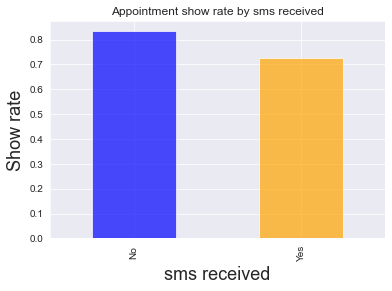

In [86]:
df.groupby('sms_received')['showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Appointment show rate by sms received');
plt.xlabel('sms received', fontsize=18)
plt.ylabel('Show rate', fontsize=18);

In [87]:
df.scheduledhour.value_counts(normalize=True)

7     0.173832
8     0.138863
9     0.116018
10    0.100031
14    0.082578
13    0.081755
11    0.076561
15    0.073096
16    0.050142
12    0.049056
17    0.026320
6     0.014277
18    0.012124
19    0.004415
20    0.000905
21    0.000027
Name: scheduledhour, dtype: float64

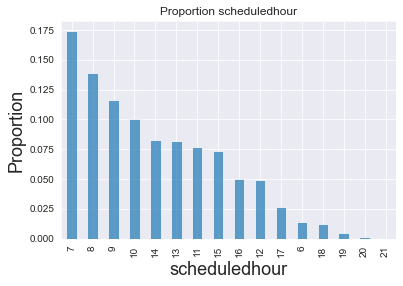

In [88]:
df.scheduledhour.value_counts(normalize=True).plot(kind='bar', alpha=.7);
plt.title('Proportion scheduledhour');
plt.xlabel('scheduledhour', fontsize=18)
plt.ylabel('Proportion', fontsize=18);

In [89]:
df.groupby('scheduledhour')['showed'].mean()

scheduledhour
6     0.807985
7     0.848488
8     0.817305
9     0.803010
10    0.779305
11    0.772158
12    0.796385
13    0.790726
14    0.773200
15    0.768164
16    0.762360
17    0.751805
18    0.787313
19    0.766393
20    0.700000
21    0.666667
Name: showed, dtype: float64

Tuesday      0.236759
Wednesday    0.219514
Monday       0.208856
Friday       0.171136
Thursday     0.163518
Saturday     0.000217
Name: scheduleddayofweek, dtype: float64

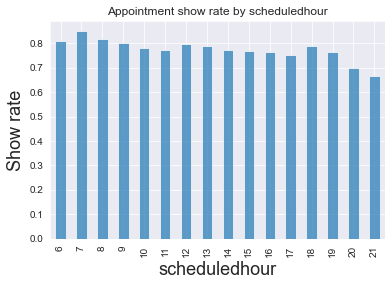

In [90]:
df.groupby('scheduledhour')['showed'].mean().plot(kind='bar', alpha=.7);


plt.title('Appointment show rate by scheduledhour');
plt.xlabel('scheduledhour', fontsize=18)
plt.ylabel('Show rate', fontsize=18);

df.scheduleddayofweek.value_counts(normalize=True)

scheduleddayofweek
Friday       0.794502
Monday       0.802417
Saturday     0.958333
Thursday     0.795275
Tuesday      0.797806
Wednesday    0.798904
Name: showed, dtype: float64

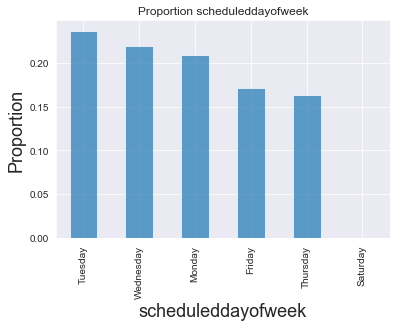

In [91]:
df.scheduleddayofweek.value_counts(normalize=True).plot(kind='bar', alpha=.7);

plt.title('Proportion scheduleddayofweek');
plt.xlabel('scheduleddayofweek', fontsize=18)
plt.ylabel('Proportion', fontsize=18);

df.groupby('scheduleddayofweek')['showed'].mean()

5     0.610001
4     0.229258
6     0.124396
3     0.032698
2     0.002542
12    0.000552
1     0.000543
11    0.000009
Name: scheduledmonth, dtype: float64

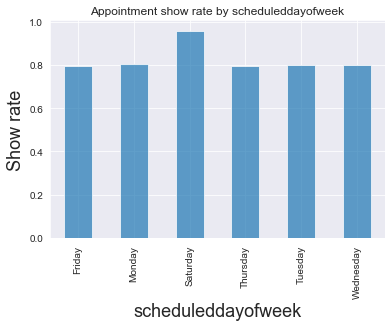

In [92]:
df.groupby('scheduleddayofweek')['showed'].mean().plot(kind='bar', alpha=.7);
plt.title('Appointment show rate by scheduleddayofweek');
plt.xlabel('scheduleddayofweek', fontsize=18)
plt.ylabel('Show rate', fontsize=18);

df.scheduledmonth.value_counts(normalize=True)

scheduledmonth
1     0.700000
2     0.708185
3     0.669065
4     0.690240
5     0.825440
6     0.899193
11    1.000000
12    0.688525
Name: showed, dtype: float64

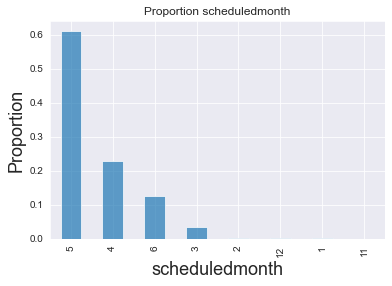

In [93]:
df.scheduledmonth.value_counts(normalize=True).plot(kind='bar', alpha=.7);
plt.title('Proportion scheduledmonth');
plt.xlabel('scheduledmonth', fontsize=18)
plt.ylabel('Proportion', fontsize=18);
df.groupby('scheduledmonth')['showed'].mean()

2016    0.999439
2015    0.000561
Name: scheduledyear, dtype: float64

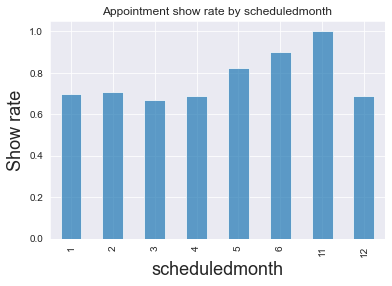

In [94]:
df.groupby('scheduledmonth')['showed'].mean().plot(kind='bar', alpha=.7);
plt.title('Appointment show rate by scheduledmonth');
plt.xlabel('scheduledmonth', fontsize=18)
plt.ylabel('Show rate', fontsize=18);
df.scheduledyear.value_counts(normalize=True)

scheduledyear
2015    0.693548
2016    0.798124
Name: showed, dtype: float64

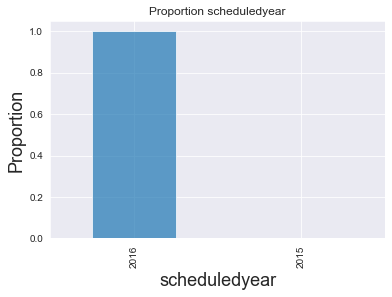

In [95]:
df.scheduledyear.value_counts(normalize=True).plot(kind='bar', alpha=.7);
plt.title('Proportion scheduledyear');
plt.xlabel('scheduledyear', fontsize=18)
plt.ylabel('Proportion', fontsize=18);
df.groupby('scheduledyear')['showed'].mean()

Wednesday    0.234035
Tuesday      0.231982
Monday       0.205508
Friday       0.172077
Thursday     0.156045
Saturday     0.000353
Name: appointmentdayofweek, dtype: float64

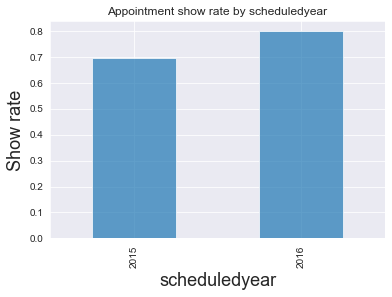

In [96]:
df.groupby('scheduledyear')['showed'].mean().plot(kind='bar', alpha=.7);
plt.title('Appointment show rate by scheduledyear');
plt.xlabel('scheduledyear', fontsize=18)
plt.ylabel('Show rate', fontsize=18);
df.appointmentdayofweek.value_counts(normalize=True)

appointmentdayofweek
Friday       0.787739
Monday       0.793519
Saturday     0.769231
Thursday     0.806459
Tuesday      0.799064
Wednesday    0.803108
Name: showed, dtype: float64

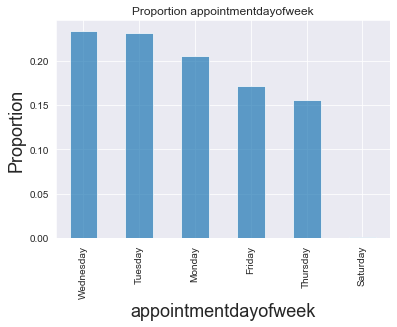

In [97]:
df.appointmentdayofweek.value_counts(normalize=True).plot(kind='bar', alpha=.7);
plt.title('Proportion appointmentdayofweek');
plt.xlabel('appointmentdayofweek', fontsize=18)
plt.ylabel('Proportion', fontsize=18);
df.groupby('appointmentdayofweek')['showed'].mean()

5    0.731421
6    0.239310
4    0.029269
Name: appointmentmonth, dtype: float64

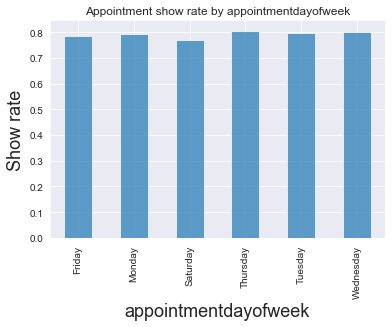

In [98]:
df.groupby('appointmentdayofweek')['showed'].mean().plot(kind='bar', alpha=.7);
plt.title('Appointment show rate by appointmentdayofweek');
plt.xlabel('appointmentdayofweek', fontsize=18)
plt.ylabel('Show rate', fontsize=18);
df.appointmentmonth.value_counts(normalize=True)

appointmentmonth
4    0.804328
5    0.792135
6    0.815425
Name: showed, dtype: float64

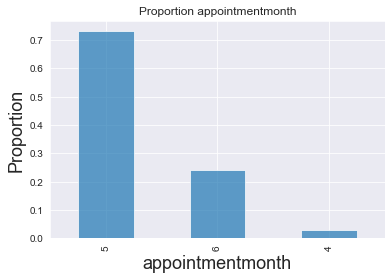

In [99]:
df.appointmentmonth.value_counts(normalize=True).plot(kind='bar', alpha=.7);
plt.title('Proportion appointmentmonth');
plt.xlabel('appointmentmonth', fontsize=18)
plt.ylabel('Proportion', fontsize=18);
df.groupby('appointmentmonth')['showed'].mean()

appointmentyear
2016    0.798066
Name: showed, dtype: float64

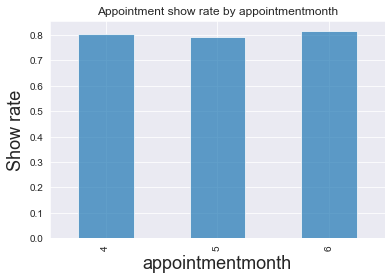

In [100]:
df.groupby('appointmentmonth')['showed'].mean().plot(kind='bar', alpha=.7);
plt.title('Appointment show rate by appointmentmonth');
plt.xlabel('appointmentmonth', fontsize=18)
plt.ylabel('Show rate', fontsize=18);
df.groupby('appointmentyear')['showed'].mean()

81

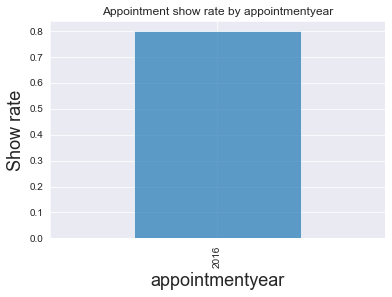

In [101]:
df.groupby('appointmentyear')['showed'].mean().plot(kind='bar', alpha=.7);
plt.title('Appointment show rate by appointmentyear');
plt.xlabel('appointmentyear', fontsize=18)
plt.ylabel('Show rate', fontsize=18);
df.neighbourhood.nunique()

In [102]:
df['neighbourhood'].value_counts(normalize = True).sort_values(ascending=False)

JARDIM CAMBURI                 0.069821
MARIA ORTIZ                    0.052522
RESISTÊNCIA                    0.040090
JARDIM DA PENHA                0.035078
ITARARÉ                        0.031793
                                 ...   
ILHA DO BOI                    0.000317
ILHA DO FRADE                  0.000090
AEROPORTO                      0.000072
ILHAS OCEÂNICAS DE TRINDADE    0.000018
PARQUE INDUSTRIAL              0.000009
Name: neighbourhood, Length: 81, dtype: float64

neighbourhood
PARQUE INDUSTRIAL              1.000000
ILHA DO BOI                    0.914286
AEROPORTO                      0.875000
MÁRIO CYPRESTE                 0.854447
SOLON BORGES                   0.852878
                                 ...   
ITARARÉ                        0.737336
SANTA CLARA                    0.735178
SANTA CECÍLIA                  0.725446
SANTOS DUMONT                  0.710815
ILHAS OCEÂNICAS DE TRINDADE    0.000000
Name: showed, Length: 81, dtype: float64

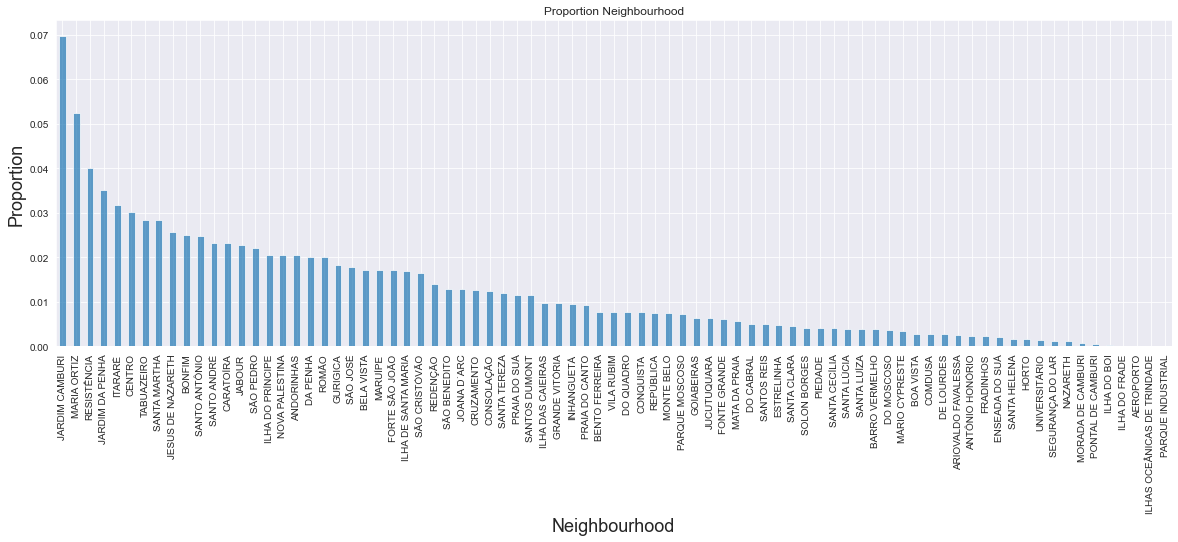

In [103]:
plt.figure(figsize = (20,6));
df['neighbourhood'].value_counts(normalize = True).sort_values(ascending=False).plot(kind='bar', alpha=.7);
plt.ylabel('Proportion', fontsize=18)
plt.xlabel('Neighbourhood', fontsize=18)
plt.title('Proportion Neighbourhood');
df.groupby('neighbourhood')['showed'].mean().sort_values(ascending=False)